In [112]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.interpolate
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import mpl_toolkits.mplot3d.art3d as art3d
import gray_codes as gray



In [113]:
def n_likes(n, array):
    return [n]*len(array)

def generate_gray(n):
    if (n<=0):
        return ['0']
    if (n==1):
        return ['0','1']
    # call recursion
    rec_ans = generate_gray(n-1)

    main_ans = []

    # Add 0 to first half
    for i in range(len(rec_ans)):
        sym = rec_ans[i]
        main_ans.append("0" + sym)
    # Add 1 to second half(mirrored)
    for i in range(len(rec_ans)-1, -1, -1):
        sym = rec_ans[i]
        main_ans.append("1" + sym)
    
    return main_ans

# This method convery binary to gray code
# Pass n e.g 100 or '100'
def convert_bin_to_gray(n):
    n = int(str(n), 2)
    n ^= (n >> 1)
    return bin(n)

 # This method convert gray code to binary 
def convert_gray_to_bin(n):
    n = int(str(n),2)
    mask = n
    while n!=0:
        mask = mask >> 1
        n ^= mask
    return bin(n)

Задаем число поднесущих

In [114]:
N = 4  # OFDM Sub Carriers
T = 1 # Period
k = 2 # nubmer of bits
Fn = 1000


Data Carriers:  [0 1 2 3]


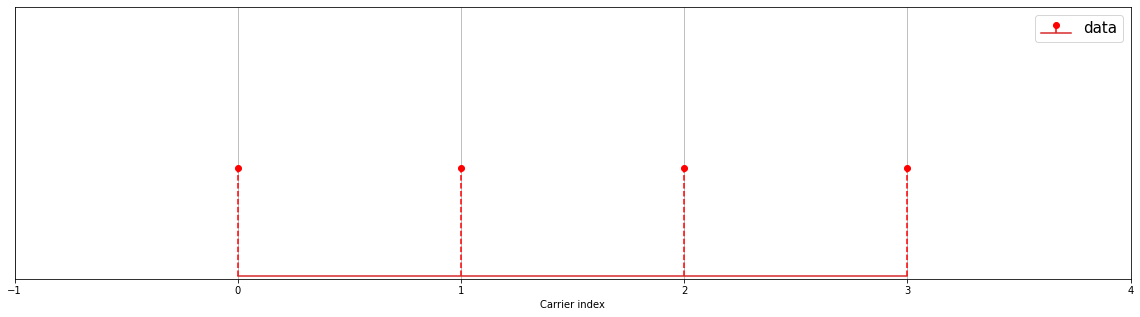

In [115]:
all_carriers = np.arange(N)  # indices of all subcarriers ([0, 1, ... K-1])

data_carriers = all_carriers

print ("Data Carriers:  %s" % data_carriers)
plt.figure(figsize=(20,5))

plt.stem(data_carriers, n_likes(4, data_carriers), use_line_collection=True,  linefmt="r--",  markerfmt='ro', label='data',)
plt.legend(fontsize=10, ncol=2, prop={'size': 15})
plt.xlim((-1,N)); plt.ylim((-0.1, 10))
plt.xlabel('Carrier index')
plt.yticks([])
plt.grid(True);

In [116]:
mu = 2 # bits per symbol
payloadBits_per_OFDM = len(data_carriers)*mu  # number of payload bits per OFDM symbol
print(payloadBits_per_OFDM)

bits = np.random.binomial(n=1, p=0.5, size=(payloadBits_per_OFDM))

print ("Bits count: ", len(bits))
print ("Random sequence: ", bits)
print ("Mean of bits (should be around 0.5): ", np.mean(bits))

8
Bits count:  8
Random sequence:  [0 0 1 0 1 1 1 1]
Mean of bits (should be around 0.5):  0.625


In [117]:
def SP(bits):
    return bits.reshape((len(data_carriers), mu))
bits_SP = SP(bits)
print (bits_SP)

[[0 0]
 [1 0]
 [1 1]
 [1 1]]


In [118]:
# pass list of sp bits (look above)
def convert_bit_arr_to_gray(bits):
   bits_str = ''.join(map(str, bits))
   gray_code = convert_bin_to_gray(bits_str)
   return gray_code


# convert binary to decimal
def convert_binary_to_decimal(binary):
   return int(binary, 2)

# 
def from_seq_to_sig(t, bits):
   sum = 0.0
   for i in range(0, N ):
      Mb_i = convert_binary_to_decimal(convert_bit_arr_to_gray(bits[i])) 
      sum += np.sin(2*np.pi*(Fn + (i/T))*t + Mb_i*np.pi/2) 
   return sum
   

[-0.9999999999999998, -0.5645248895050607, 1.136593340523895, 3.0689581309889626, 3.4413690982646528, 1.5876366880229424, -1.1295507305653567, -2.515972085250032, -1.664990833594312, 0.23686741849932663, 1.235760397263963, 0.582174950444276, -0.7443442485999096, -1.3437867438224922, -0.9140640042365054, -0.3058797663510413, -0.2703672199562843, -0.5364382117114228, -0.2945317866549467, 0.638326472107262, 1.5039458718585048, 1.5385908771267869, 0.9425140850031384, 0.6010463063211732, 0.8617008134292441, 0.9402369223858202, -0.15600443851191548, -2.1894936888425116, -3.5385908771144767, -2.7509254755149524, -0.19328460407904346, 2.0964695224801524, 2.3383759475191495, 0.7154090878569063, -0.941099837341133, -1.085935995681159, 0.09680714012356106, 1.1893861165655701, 1.2197627853603186, 0.566177338507261, 0.208174449345513, 0.41801122998069756, 0.5159720852185312, -0.1174288732266906, -1.1425948201942235, -1.6394313624353383, -1.267020395083308, -0.6915514725032095, -0.6824547141639896, 

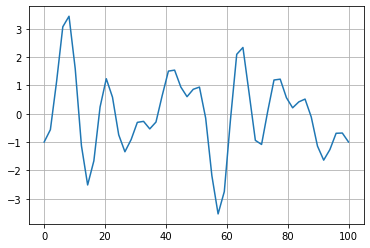

In [119]:
t = np.linspace(0, 100)
modulated_sig = list()
modulated_sig2 = list()

for time in t:
   modulated_sig.append(from_seq_to_sig(time, bits_SP))

print(modulated_sig)

plt.grid(True)
plt.plot(t, modulated_sig)
plt.show()